<a href="https://colab.research.google.com/github/SOUlEYMANEFOMBA/heron/blob/master/DATATOUR_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# **Challenge Finale DataTour 2024 :** Prédiction des ventes futures pour une entreprise basée sur les ventes passées et des facteurs contextuels

---

### **Contexte :**

L’Afrique connaît une dynamique économique croissante avec une diversité d'entreprises opérant dans des secteurs variés (commerce de détail, e-commerce, agroalimentaire, etc.). Cependant, l'un des défis majeurs pour les entreprises africaines reste la gestion des stocks et la prédiction des ventes futures. Une prédiction précise des ventes peut aider les entreprises à mieux gérer leur inventaire, optimiser leurs promotions, ajuster leur stratégie de prix et maximiser leurs profits. En raison de la nature volatile de la demande, des promotions fréquentes, de la variation des conditions météorologiques et des événements spéciaux (tels que les fêtes et jours fériés), une méthode basée sur l'analyse des données passées est essentielle pour établir des prévisions fiables.

Ce projet vise à **prédire les ventes futures d'une entreprise** en se basant sur les ventes passées et plusieurs facteurs contextuels influençant la demande, notamment les promotions, les jours fériés, les conditions météorologiques et la disponibilité des stocks.

---

### **Objectifs :**

À partir des données historiques de ventes d'une entreprise entre **2022-01-01 et 2024-10-31**, prédire le nombre d'unités qui seront vendues entre le **2024-11-01 et le 2024-11-30**. Cette prédiction permettra à l'entreprise de mieux gérer ses stocks, planifier ses campagnes promotionnelles et ajuster ses stratégies de marketing.

---

### **Structure des données**

Les données sont divisées en deux fichiers distincts :

1. **Fichier d’entraînement** (`train.csv`) :
   - **Taille** : 83 047 lignes.
   - **Colonnes** : Comprend toutes les colonnes, y compris la cible `quantite_vendue`.
   - **Utilisation** : Ces données servent à entraîner et tester votre modèles.
   - **Source** : https://raw.githubusercontent.com/dataafriquehub/donnee_vente/refs/heads/main/train.csv


2. **Fichier de soumission** (`submission.csv`) :
   - **Taille** : 2 576 lignes.
   - **Colonnes** : Contient toutes les caractéristiques sauf la colonne cible `quantite_vendue`.
   - **Utilisation** : Ce fichier doit être utilisé pour générer les prédictions finales, sans accès à la colonne cible.
   - **Source** : https://raw.githubusercontent.com/dataafriquehub/donnee_vente/refs/heads/main/submission.csv

---

### **Description des colonnes**

Le dataset contient des informations relatives aux transactions de ventes passées, couvrant la période du **2022-01-01 au 2024-10-31**. Les variables disponibles sont :
Voici les informations sous forme de tableau :

| **Variable**                | **Description**                                                                                   |
|-----------------------------|---------------------------------------------------------------------------------------------------|
| **ID Produit (id_produit)**  | Identifiant unique pour chaque produit vendu.                                                     |
| **Date (date)**              | La date de la vente, allant du 1er janvier 2022 au 31 octobre 2024.                               |
| **Catégorie (categorie)**    | La catégorie du produit (ex. Électronique, Habillement, Alimentaire).                             |
| **Marque (marque)**          | La marque du produit (ex. Samsung, Nike, Nestlé, etc.).                                           |
| **Prix Unitaire (prix_unitaire)** | Le prix de vente par unité du produit.                                                            |
| **Promotion (promotion)**    | Indicateur binaire (0 ou 1) indiquant si le produit était en promotion au moment de la vente.     |
| **Jour Férié (jour_ferie)**  | Indicateur binaire (0 ou 1) indiquant si la vente a eu lieu un jour férié.                        |
| **Week-end (weekend)**       | Indicateur binaire (0 ou 1) indiquant si la vente a eu lieu un week-end.                          |
| **Stock Disponible (stock_disponible)** | Nombre d’unités disponibles pour la vente ce jour-là.                                            |
| **Condition Météo (condition_meteo)** | Type de condition météo le jour de la vente (ex. Ensoleillé, Pluie, Orageux, Neigeux).              |
| **Région (region)**          | Région géographique de la vente (ex. Urbain, Périurbain, Rural).                                 |
| **Moment de la Journée (moment_journee)** | Le moment de la journée où la vente a eu lieu (ex. Matinée, Après-midi, Soirée).                |
| **Quantité Vendue (quantite_vendue)** | Le nombre d'unités réellement vendues de chaque produit (pour l'entraînement seulement).         |


*Note :* La **Quantité Vendue** est la variable cible à prédire pour la période de novembre 2024.

Ces données serviront à entraîner le modèle de prédiction pour estimer les ventes du mois de **novembre 2024** (du **2024-11-01 au 2024-11-30**).

---

### **Critères d'évaluation**
Les prédictions des équipes seront évaluées à l'aide de la **Mean Absolute Percentage Error (MAPE)**. Cette métrique mesure l'erreur moyenne entre les valeurs réelles et prédites en pourcentage.

- Les équipes seront classées selon leur **score MAPE**.
- **Les équipes ayant les MAPE les plus faibles** (indiquant une meilleure précision) seront classées en tête.
- Trois soumissions au plus par équipe quotidiennement

---

### **Format de la soumission**
Les participants doivent soumettre un fichier CSV avec exactement les colonnes suivantes :

- **`id`** : L'identifiant de chaque ligne dans `submission.csv`.
- **`quantite_vendue`** : La prédiction de la quantite_vendue pour chaque ligne.
- **Lien vers le formulaire soumission :** https://docs.google.com/forms/d/e/1FAIpQLSeZcaBaYLSa8ZJ3xcqFEIuTThA4GcaBBIwI32RzEzNaYh-kAg/viewform

Exemple de format attendu :
```csv
id,quantite_vendue
1,320
2,7500
3,1000
...
```

---




Ainsi, ce projet de prédiction des ventes est non seulement crucial pour l'entreprise dans sa gestion quotidienne, mais il permet également de mieux anticiper les besoins du marché à l'échelle locale, avec une approche basée sur les données réelles de l'entreprise.

**Prêts à relever? Faites donc partir des meilleurs de DataTour2024 et faites briller les couleurs des drapeaux de votre pays**

##Analyse Exploiratoire des Données

In [1]:
import pandas as pd                 # for data manipulation and analysis
import numpy as np                  # for mathematical operations
import plotly.express as px         # for data visualization
import seaborn as sns               # for data visualization
import matplotlib.pyplot as plt     # for data visualization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
train_data = pd.read_csv("https://raw.githubusercontent.com/dataafriquehub/donnee_vente/refs/heads/main/train.csv")
sub_data = pd.read_csv("https://raw.githubusercontent.com/dataafriquehub/donnee_vente/refs/heads/main/submission.csv")

In [4]:
train_data.shape
sub_data.shape

(2576, 13)

In [5]:
##Transformez les données dans un type de données adapté.
analyst_data = train_data.copy()
analyst_data['date'] = pd.to_datetime(analyst_data['date'])
for col in analyst_data.columns:
    if analyst_data[col].dtype == 'object':
        analyst_data[col] = analyst_data[col].astype('category')

##Convertir ces variables dans le bon format après le nettoyages
# analyst_data['weekend'] = analyst_data['weekend'].astype(int)
# analyst_data['promotion'] = analyst_data['promotion'].astype(int)
# analyst_data['jour_ferie'] = analyst_data['jour_ferie'].astype(int)

Visualisation des données brutes

<ipython-input-6-886201431524>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0, 0], x="categorie", data=train_data, palette="Set2")
<ipython-input-6-886201431524>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0, 1], x="marque", data=train_data, palette="Set2")
<ipython-input-6-886201431524>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[1, 0], x="condition_meteo", data=train_data, palette="Set2", orient='v')
<ipython-input-6-886201431524>:8: FutureWarning: 

Passing `palette` without assigning `hue` is d

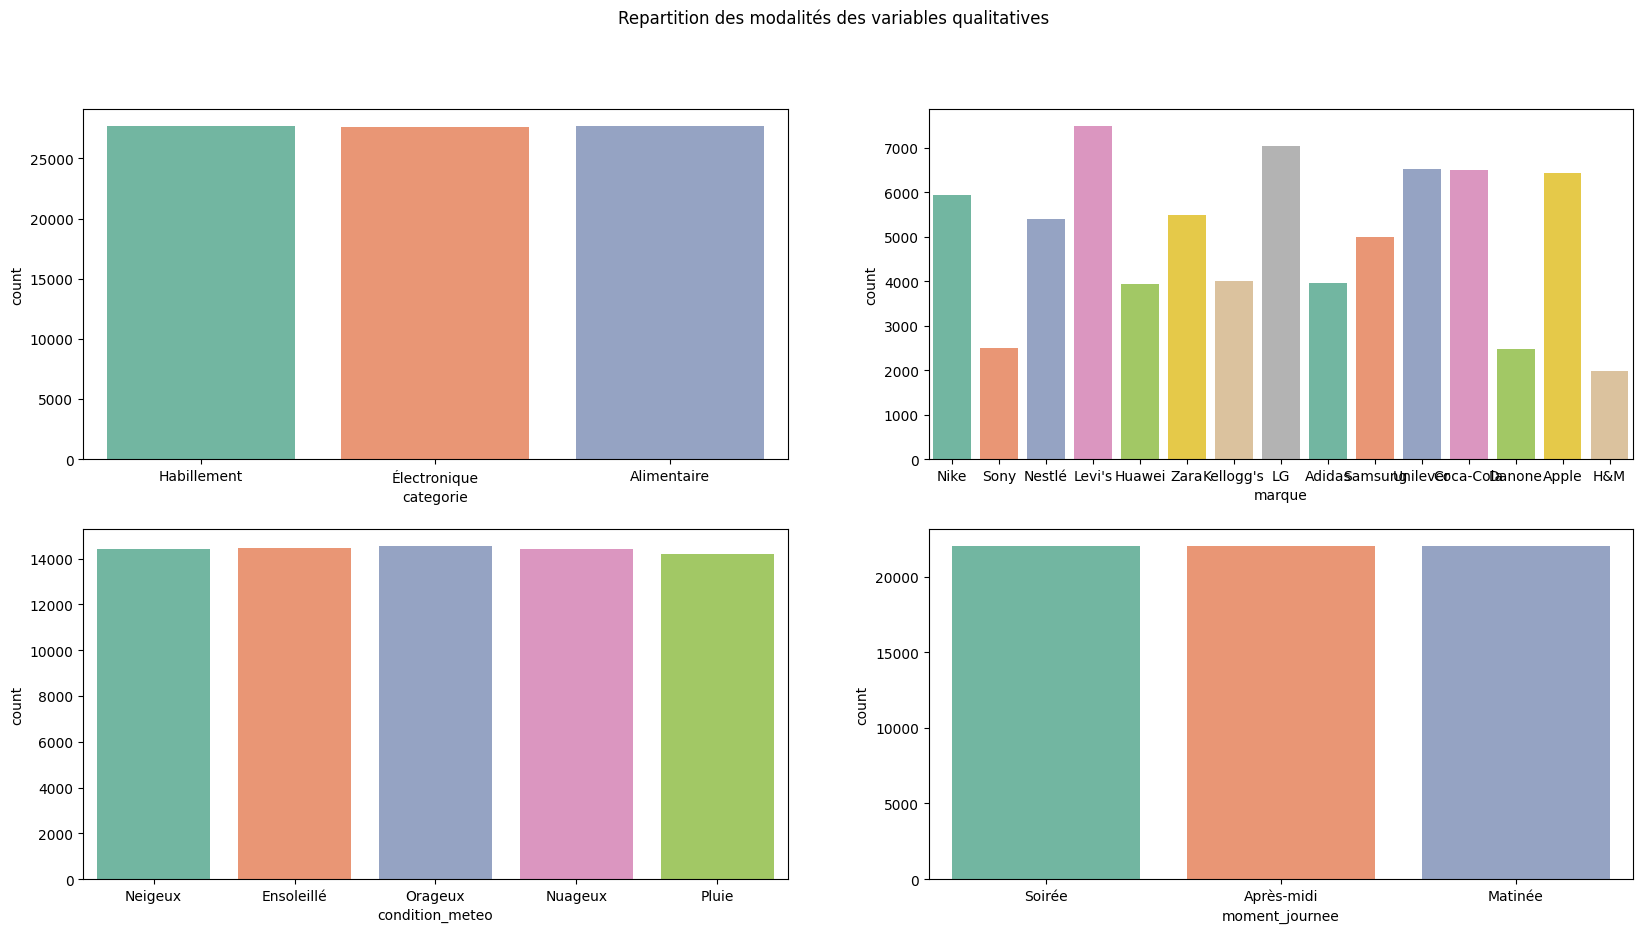

In [6]:
# Repartition des modalités des variables qualitatives

fig, axes = plt.subplots(2, 2, figsize=(20, 10))
fig.suptitle('Repartition des modalités des variables qualitatives')
sns.countplot(ax=axes[0, 0], x="categorie", data=train_data, palette="Set2")
sns.countplot(ax=axes[0, 1], x="marque", data=train_data, palette="Set2")
sns.countplot(ax=axes[1, 0], x="condition_meteo", data=train_data, palette="Set2", orient='v')
sns.countplot(ax=axes[1, 1], x="moment_journee", data=train_data, palette="Set2")
plt.show()

Histogramme

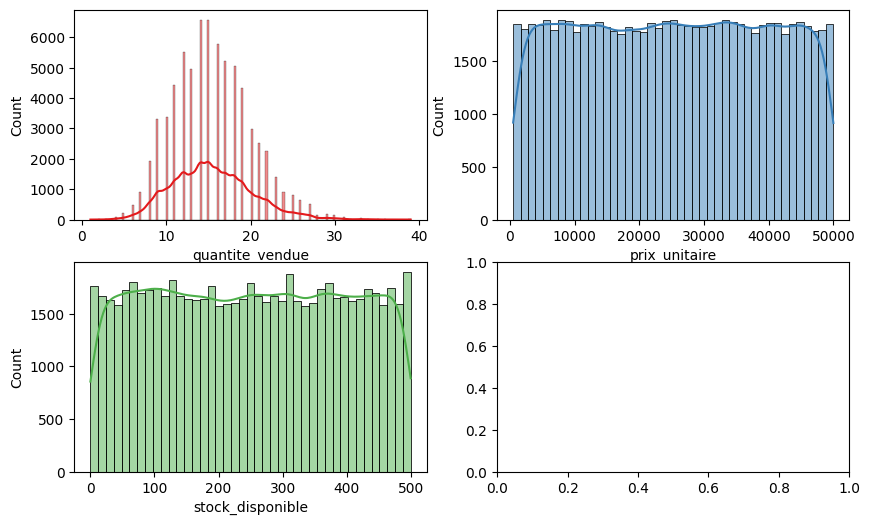

In [7]:
#kde=True pour avoir la densité en plus de l'histogramme
fig, ax = plt.subplots(2,2,figsize=(10, 6))
sns.histplot(data=analyst_data, x="quantite_vendue", color="#e41a1c", kde=True, ax=ax[0,0])
sns.histplot(data=analyst_data, x="prix_unitaire", color="#377eb8", kde=True, ax=ax[0,1])
sns.histplot(data=analyst_data, x="stock_disponible", color="#4daf4a", kde=True, ax=ax[1,0])
plt.show()

Nettoyage de la base des données

In [8]:
##Suppression des colonnes inutile
def drop_unuseful_col(data, cols):
  dfs = []
  for df in data:

      df = df.drop(columns = cols)

      dfs.append(df)

  return dfs

cols = ['Unnamed: 0']
trains_data, subs_data = drop_unuseful_col([train_data, sub_data],cols[0])

In [9]:
##Mise au bon format les données
def encodage(data):
      dfs=[]
      for df in data:
         df['date'] = pd.to_datetime(df['date'])
         for col in df.columns:
            if df[col].dtype == 'object':
                df[col] = df[col].astype('category')
         dfs.append(df)

      return data

trains_data,subs_data= encodage([trains_data,subs_data])

Etude des valeurs manquantes et aberantes

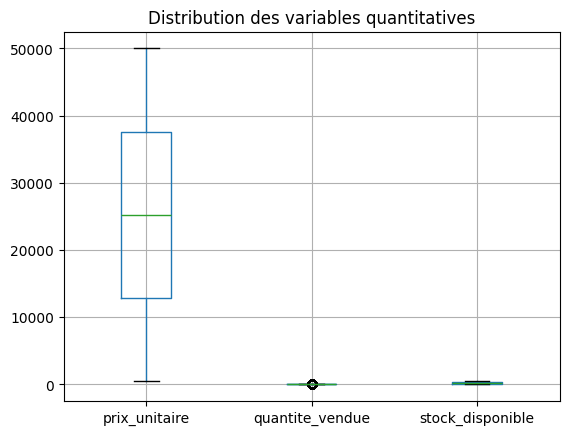

In [10]:
trains_data.boxplot(column=['prix_unitaire','quantite_vendue','stock_disponible'])
plt.title("Distribution des variables quantitatives")
plt.show()

Valeur manquante

In [11]:
na = trains_data.isna().sum()/trains_data.shape[0]*100 #calcul du pourcentage de valeurs manquantes par variable

px.bar(na.sort_values(),
         title = "Pourcentage de valeurs manquantes par variable",
         color_discrete_sequence = ["#377eb8"],
         template='ggplot2',
         range_y = [0,100],
         width=800,
         labels={'value':'%', 'index':''},
         color=None
        ).update_traces(showlegend=False).update_xaxes(tickangle=45)

In [10]:
# valeurs manquantes par ligne
trains_data.isna().sum(axis=1).value_counts()

px.bar(trains_data.isna().sum(axis=1).value_counts(),
            title = "Nombre de valeurs manquantes par ligne",
            color_discrete_sequence = ["#377eb8"],
            template='ggplot2',
            range_y = [0,100],
            width=800,
            labels={'value':'%', 'index':''},
            color=None
            ).update_traces(showlegend=False).update_xaxes(tickangle=45)

In [11]:
#affichier les lignes avec des valeurs manquantes
threshold = round(trains_data.shape[1]*0.7)

trains_data[trains_data.isna().sum(axis=1) > threshold]

,id_produit,date,categorie,marque,prix_unitaire,promotion,jour_ferie,weekend,stock_disponible,condition_meteo,region,moment_journee,quantite_vendue


In [12]:
# imputer perso compatible avec sklearn
# necéssite d'implémenter les méthodes fit, transform et fit_transform
# pour plus d'infos: https://scikit-learn.org/stable/developers/develop.html

class inputer_perso():
    def __init__(self) -> None:
        pass

    def fit(self, X, y=None):
        self.X = X
        return self

    def transform(self, X, y=None):
        X = X.copy()
        for col in X.columns:
            if X[col].dtype != 'float64':
                X[col] = X.loc[:,col].fillna(X[col].mode()[0])
            else:
                X[col] = X.loc[:,col].fillna(X[col].mean())
        return X

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

In [13]:
# Regles de imputation des données
# 1. Si la variable a plus de 40% de valeurs manquantes, on la supprime
# 2. Si la variable est qualitative, on remplace les valeurs manquantes par le mode
# 3. Si la variable est quantitative, on remplace les valeurs manquantes par la médiane
# 4. Autre règle que je veux ajouter à tester après :
# 4.1 Au lieu de remplacer par le mode de la colonne je veux plutôt remplacer par le mode du produit( pour variable catégorielles)
# 4.2 Au lieu de remplacer par la médiane de la colonne je veux plutôt remplacer par la médianne du produit( pour variable quantitative)

def imputation_par_categorie_marque_date(df):
    print("Nombre de lignes et de colonnes : ", df.shape,
          "\nNombre de valeurs manquantes : ", df.isnull().sum().sum())

    default_categories = {
    "marque": "Nestlé",
    "condition_meteo": "Ensoleillé",
    "moment_journee": "Après-midi",
    "region": "Urbain"
        }

    df = df.copy()

    # Trier les données pour maintenir un ordre logique
    # df = df.sort_values(by=['categorie', 'marque', 'date', 'id_produit'], ascending=True)

    # Supprimer les colonnes avec plus de 40% de valeurs manquantes
    df = df.dropna(thresh=len(df) * 0.6, axis=1)

    # Imputation des valeurs manquantes
    for col in df.columns:
        if col not in ['categorie','date']:  # Exclure les colonnes qui n'ont pas de na
            if df[col].dtype == 'object' or df[col].dtype.name == 'category':  # Variables catégorielles
                # Remplir les NaN avec le mode par catégorie, marque, date et id_produit
                df[col] = df[col].transform(
                    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else default_categories.get(col, "Unknown")
                ))
                print(f"{col} : Mode appliqué")
            else:  # Variables quantitatives
                # Remplir les NaN avec la médiane par catégorie, marque et date
                df[col] = df[col].transform(
                    lambda x: x.fillna(x.median())
                )
                print(f"{col} : Médiane appliquée")

    print("Données nettoyées !",
          "\nNombre de lignes et de colonnes : ", df.shape,
          "\nNombre de valeurs manquantes : ", df.isnull().sum().sum())

    return df
clean_data_trains= imputation_par_categorie_marque_date(trains_data)
clean_data_subs= imputation_par_categorie_marque_date(subs_data)

Nombre de lignes et de colonnes :  (83047, 13) 
Nombre de valeurs manquantes :  151906
id_produit : Mode appliqué
marque : Mode appliqué
prix_unitaire : Médiane appliquée
promotion : Médiane appliquée
jour_ferie : Médiane appliquée
weekend : Médiane appliquée
stock_disponible : Médiane appliquée
condition_meteo : Mode appliqué
region : Mode appliqué
moment_journee : Mode appliqué
quantite_vendue : Médiane appliquée
Données nettoyées ! 
Nombre de lignes et de colonnes :  (83047, 13) 
Nombre de valeurs manquantes :  0
Nombre de lignes et de colonnes :  (2576, 12) 
Nombre de valeurs manquantes :  0
id_produit : Mode appliqué
marque : Mode appliqué
prix_unitaire : Médiane appliquée
promotion : Médiane appliquée
jour_ferie : Médiane appliquée
weekend : Médiane appliquée
stock_disponible : Médiane appliquée
condition_meteo : Mode appliqué
region : Mode appliqué
moment_journee : Mode appliqué
Données nettoyées ! 
Nombre de lignes et de colonnes :  (2576, 12) 
Nombre de valeurs manquantes :  0

In [14]:
def indicator_to_int(df):
  """Transforms indicator variables in a DataFrame to integers.

  Args:
    df: The input DataFrame.

  Returns:
    A new DataFrame with indicator variables converted to integers.
  """
  ##Convertir ces variables dans le bon format après le nettoyages
  dfs=[]
  variables_indicatrice=['weekend','promotion','jour_ferie']
  df_copy = df.copy()  # Create a copy to avoid modifying the original DataFrame

  for df in df_copy:
      for col in variables_indicatrice:
          try:
              # Attempt to convert to integer, handling potential errors gracefully
              df[col] = df[col].astype(int)

          except Exception as e:
              print(f"Column '{col}' could not be converted to integers. Check for non-numeric categories due to {e}")
              # You can choose to handle the error in another way (e.g., replace values)
              # if necessary.
      dfs.append(df)

  return dfs


# Example usage (assuming 'analyst_data' is your DataFrame)
final_clean_data_trains, final_clean_data_subs= indicator_to_int([clean_data_trains,clean_data_subs])

In [17]:
final_clean_data_subs.shape

(2576, 12)

# Modélisation

In [20]:
final_clean_data_trains.head()

,id_produit,date,categorie,marque,prix_unitaire,promotion,jour_ferie,weekend,stock_disponible,condition_meteo,region,moment_journee,quantite_vendue
0,HAB-102024-024,2022-01-01,Habillement,Nike,31247.38,0,0,1,37.0,Neigeux,Urbain,Soirée,15.0
1,ÉLE-062022-019,2022-01-01,Électronique,Sony,13627.42,1,0,1,250.0,Ensoleillé,Urbain,Après-midi,23.0
2,ALI-072022-019,2022-01-01,Alimentaire,Nestlé,14606.88,1,0,1,426.0,Neigeux,Rural,Après-midi,7.0
3,HAB-042023-029,2022-01-01,Habillement,Levi's,30778.05,0,0,0,341.0,Neigeux,Périurbain,Soirée,17.0
4,HAB-122023-027,2022-01-01,Habillement,Levi's,5627.53,0,0,1,135.0,Ensoleillé,Urbain,Soirée,16.0


In [68]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Chargement de la base de données
df = final_clean_data_trains
sub_data_s=final_clean_data_subs
# Encodage des variables catégorielles pour l'entrainement
encoder = OneHotEncoder(sparse_output=False)
encoded_categories = encoder.fit_transform(df[['categorie', 'marque', 'region', 'moment_journee','condition_meteo']])
encoded_df = pd.DataFrame(encoded_categories, columns=encoder.get_feature_names_out(['categorie', 'marque', 'region', 'moment_journee','condition_meteo']))

#encodage pour les données de submission
encoded_categories_s = encoder.transform(sub_data_s[['categorie', 'marque', 'region', 'moment_journee','condition_meteo']])
encoded_df_s = pd.DataFrame(encoded_categories_s, columns=encoder.get_feature_names_out(['categorie', 'marque', 'region', 'moment_journee','condition_meteo']))

# Ajout au DataFrame principal de train
df = pd.concat([df, encoded_df], axis=1)
df.drop(['categorie', 'marque', 'region', 'moment_journee','condition_meteo'], axis=1, inplace=True)

#Ajout au dataframe principal de sub
sub_data_s = pd.concat([sub_data_s, encoded_df_s], axis=1)
sub_data_s.drop(['categorie', 'marque', 'region', 'moment_journee','condition_meteo'], axis=1, inplace=True)

In [70]:
from operator import sub
#feature engenering
# Extraire les informations temporelles
df['date'] = pd.to_datetime(df['date'])
df['jour_semaine'] = df['date'].dt.weekday  # 0=Lundi, 6=Dimanche
df['mois'] = df['date'].dt.month
# df['saison'] = df['mois'].apply(lambda x: 'Hiver' if x in [12, 1, 2] else ('Printemps' if x in [3, 4, 5] else ('Été' if x in [6, 7, 8] else 'Automne')))

# Tri des données par produit et date
df = df.sort_values(by=['id_produit', 'date'])

# Transformer les ventes des 30 jours précédents en listes
# Appliquer cette fonction à chaque produit
# Appliquer le décalage de 30 jours par produit
df['quantite_vendue_lag_30'] = df.groupby('id_produit')['quantite_vendue'].shift(30)
df = df[df['quantite_vendue_lag_30'].notna()]

# df=imputation_par_categorie_marque_date(df)

##Pour la base sub
#feature engenering
# Extraire les informations temporelles
sub_data_s['date'] = pd.to_datetime(sub_data_s['date'])
sub_data_s['jour_semaine'] = sub_data_s['date'].dt.weekday  # 0=Lundi, 6=Dimanche
sub_data_s['mois']=sub_data_s['date'].dt.month
# # Extraire les 30 dernières valeurs de 'quantite_vendue' par produit
grouped_data30 = final_clean_data_trains.groupby('id_produit').apply(
     lambda x: x.sort_values('date', ascending=False).head(30)
 )

# # Reset index and select the desired columns
last_30_sales = grouped_data30.reset_index(drop=True)[['id_produit', 'date', 'quantite_vendue']]
last_30_sales = last_30_sales.rename(columns={'quantite_vendue': 'quantite_vendue_lag_30'})
# Associer les dates de sub_data_s à last_30_sales pour aligner les données
last_30_sales= last_30_sales.drop('date', axis=1).merge(
    sub_data_s[['id_produit', 'date']], on='id_produit', how='inner'
)
# Dédupliquer last_30_sales pour s'assurer qu'une seule ligne par (id_produit, date)
last_30_sales = last_30_sales.drop_duplicates(subset=['id_produit', 'date'])

# Réaliser la jointure en garantissant la taille finale de sub_data_s
sub_data_s= sub_data_s.merge(
    last_30_sales[['id_produit', 'date', 'quantite_vendue_lag_30']],
    on=['id_produit', 'date'],
    how='left'
)

# Vérifier la taille finale
assert len(sub_data_s) == 2576, "La taille finale de sub_data_s n'est pas correcte !"
sub_data_s.shape
# # Faire la jointure entre sub_data_s et last_30_sales sur la clé
# sub_data_s = sub_data_s.merge(last_30_sales[['id_produit', 'quantite_vendue_lag_30']], on='id_produit', how='left')
# # sub_data_s=imputation_par_categorie_marque_date(sub_data_s)


<ipython-input-70-7418b0685525>:15: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-70-7418b0685525>:27: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-70-7418b0685525>:27: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



(2576, 39)

In [ ]:
##Calculer l'impact du stock sur la quantité vendue.
# Si le stock est faible, cela peut limiter les ventes.
# Créer une nouvelle variable stock_ratio pour indiquer le ratio de stock par rapport à la demande passée.

In [93]:
#modélisation
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Séparation des variables indépendantes et dépendantes
X = df.drop(['quantite_vendue', 'date','id_produit'], axis=1)
y = df['quantite_vendue']

# Division en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


RMSE: 0.23482446347423627

In [19]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_percentage_error
import joblib

def train_and_evaluate_regressors(X_train, y_train, X_test, y_test, model_type='random_forest', param_grid=None,save_model=True):
    """
    Entraîne et évalue les modèles de régression spécifiés, trouve les meilleurs hyperparamètres
    avec GridSearchCV, et calcule le RMSE sur l'échelle réelle après une transformation
    logarithmique.

    Args:
        X_train: Les données d'entraînement (features).
        y_train: Les valeurs cibles pour l'entraînement (échelle originale).
        X_test: Les données de test (features).
        y_test: Les valeurs cibles pour le test (échelle originale).
        model_type: Le type de modèle à entraîner ('random_forest', 'gradient_boosting',
                    'ada_boost', ou 'bagging'). Par défaut 'random_forest'.
        param_grid: Un dictionnaire contenant les hyperparamètres à tester pour GridSearchCV.
                    Si None, utilise une grille par défaut pour chaque type de modèle.

    Returns:
        Un tuple contenant :
            - Le meilleur modèle entraîné.
            - Le RMSE sur les données de test (échelle originale).
    """

    # Grilles d'hyperparamètres par défaut pour chaque modèle
    default_param_grids = {
        'random_forest': {'n_estimators': [100, 200, 300], 'max_depth': [None, 5, 10]},
        'gradient_boosting': {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2]},
        'ada_boost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1]},
        'bagging': {'n_estimators': [10, 20, 30], 'max_samples': [0.5, 0.7, 1.0]}
    }

    if param_grid is None:
        param_grid = default_param_grids[model_type]

    # Choix du modèle
    if model_type == 'random_forest':
        model = RandomForestRegressor()
    elif model_type == 'gradient_boosting':
        model = GradientBoostingRegressor()
    elif model_type == 'ada_boost':
        model = AdaBoostRegressor()
    elif model_type == 'bagging':
        model = BaggingRegressor()
    else:
        raise ValueError("model_type doit être 'random_forest', 'gradient_boosting', 'ada_boost', ou 'bagging'")

    grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_absolute_percentage_error', cv=5)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test).clip(0, None)
    MAPE = mean_absolute_percentage_error(y_test, y_pred)

    print(f"Meilleurs hyperparamètres pour {model_type}: {grid_search.best_params_}")
    print(f"Meilleur score (MSE négatif): {grid_search.best_score_}")
    print(f"RMSE sur les données de test (échelle originale): {MAPE}")
    if save_model:
        filename = f"{model_type}_model.joblib"
        joblib.dump(best_model, filename)
        print(f"Modèle sauvegardé sous : {filename}")
    return best_model, MAPE

In [94]:
rf_best_model2 = train_and_evaluate_regressors(X_train, y_train, X_test, y_test, model_type='random_forest', param_grid=None)

Meilleurs hyperparamètres pour random_forest: {'max_depth': 5, 'n_estimators': 200}
Meilleur score (MSE négatif): -0.2340036180873569
RMSE sur les données de test (échelle originale): 0.2335042472317143
Modèle sauvegardé sous : random_forest_model.joblib


Meilleurs hyperparamètres pour random_forest: {'max_depth': 5, 'n_estimators': 300}
Meilleur score (MSE négatif): -0.23492476298757098
RMSE sur les données de test (échelle originale): 0.22796032138612404
Modèle sauvegardé sous : random_forest_model.joblib

In [ ]:
##pense à remplacer le 7_day_avg_sales par la moyenne du mois précédent donc pour mes données de submission je vais utiliser ceux du mois d'octobre

In [95]:
# Charger les modèles Lasso et Ridge
sub_data_ss=sub_data_s.drop(['date','id_produit'],axis=1)
random_forest_model = joblib.load('random_forest_model.joblib')

# Générer des prédictions avec le modèle Lasso
random_forest_predictions = random_forest_model.predict(sub_data_ss)



# Créer un DataFrame avec les prédictions de Lasso
random_forest_submission_df = pd.DataFrame({'id': sub_data_s.index, 'quantite_vendue': random_forest_predictions})


# Enregistrer les prédictions de Lasso dans un fichier CSV
random_forest_submission_df.to_csv('random_forest_submission.csv', index=False)

